05.1

In [42]:
import pandas as pd
import csv
import numpy as np
alldata=pd.read_csv(file_name)
N = np.random.randint(10000,len(alldata))
data=pd.read_csv('data_000637.txt',nrows=N)
data


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1162569,1,1,18,3869210145,1683,16
1162570,1,1,45,3869210145,1689,18
1162571,1,1,23,3869210145,1691,21
1162572,1,1,53,3869210145,1687,25


05.2

In [43]:
data.loc[:,['ORBIT_CNT', 'BX_COUNTER']]

,ORBIT_CNT,BX_COUNTER
0,3869200167,2374
1,3869200167,2374
2,3869200167,2553
3,3869200167,2558
4,3869200167,2760
...,...,...
1162569,3869210145,1683
1162570,3869210145,1689
1162571,3869210145,1691
1162572,3869210145,1687


In [44]:
bc = data["BX_COUNTER"]
X = len(bc)
print("Len:",X)

bc = data["BX_COUNTER"]
Y = bc.max()
print('Max :', Y)

Len: 1162574
Max : 3563


05.3

In [45]:
def timing(dat):
    t = dat["TDC_MEAS"]*25/30 + 25*dat["BX_COUNTER"] + 3563*25*dat["ORBIT_CNT"] 
    return t

time = timing(data)
tot_time = time.max()-time.min()

print("The data taking lasted", tot_time*1e-9, "s")

The data taking lasted 0.8887733291250001 s


05.4

In [46]:
data['Total time'] = pd.Series(timing(data), index=data.index)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Total time
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1162569,1,1,18,3869210145,1683,16,3.446499e+14
1162570,1,1,45,3869210145,1689,18,3.446499e+14
1162571,1,1,23,3869210145,1691,21,3.446499e+14
1162572,1,1,53,3869210145,1687,25,3.446499e+14


05.5

In [49]:
data['HEAD'] = pd.Series(np.random.randint(0,2,N), index=data.index)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Total time
0,0,0,123,3869200167,2374,26,3.446490e+14
1,0,0,124,3869200167,2374,27,3.446490e+14
2,0,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,0,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
1162569,1,1,18,3869210145,1683,16,3.446499e+14
1162570,1,1,45,3869210145,1689,18,3.446499e+14
1162571,1,1,23,3869210145,1691,21,3.446499e+14
1162572,0,1,53,3869210145,1687,25,3.446499e+14


05.6

In [50]:
cleaned= data[data["HEAD"] !=0]
cleaned
    

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Total time
3,1,0,64,3869200167,2558,19,3.446490e+14
5,1,0,63,3869200167,2762,4,3.446490e+14
8,1,0,62,3869200167,2774,21,3.446490e+14
9,1,0,60,3869200167,2788,7,3.446490e+14
10,1,1,7,3869200167,2785,4,3.446490e+14
...,...,...,...,...,...,...,...
1162563,1,1,32,3869210145,1682,14,3.446499e+14
1162566,1,1,72,3869210145,1694,1,3.446499e+14
1162569,1,1,18,3869210145,1683,16,3.446499e+14
1162570,1,1,45,3869210145,1689,18,3.446499e+14


05.7

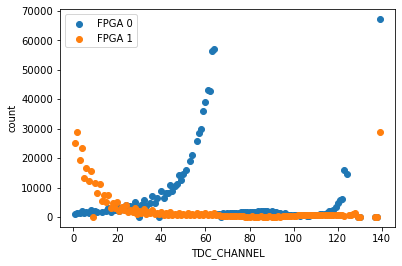

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

F0 = data[data["FPGA"]==0]["TDC_CHANNEL"].value_counts()
F1 = data[data["FPGA"]==1]["TDC_CHANNEL"].value_counts()

plt.scatter(F0.index,F0.values, marker="o", label = "FPGA 0")
plt.scatter(F1.index,F1.values,marker="o", label = "FPGA 1")

plt.xlabel('TDC_CHANNEL')
plt.ylabel('count')
plt.legend()

05.8

In [98]:
data['HEAD'] = pd.Series(1, index=data.index) #use HEAD column as counter by making it all 1 again
TDCgpby = data.groupby(['FPGA','TDC_CHANNEL']).sum() #now NoiseCounter contains counts for that channel of that FPGA
top3 = pd.DataFrame(TDCgpby['HEAD'].nlargest(3).index, index =['most','second','3rd'], columns=['(FPGA and TDC_CHANNEL)'])
top3

,(FPGA and TDC_CHANNEL)
most,"(0, 139)"
second,"(0, 64)"
3rd,"(0, 63)"


05.9

In [101]:
ORBITgroup = data.groupby('ORBIT_CNT').sum()
uniqORB = ORBITgroup[ORBITgroup['HEAD'] == 1]
print("The number of unique orbits:", len(uniqORB.index))

group139 = data[data['TDC_CHANNEL'] == 139].groupby('ORBIT_CNT').sum()
uniq139 = group139[group139['HEAD']==1] 
print("The number of TDC_CHANNEL=139 :", len(uniq139.index))

The number of unique orbits: 2
The number of TDC_CHANNEL=139 : 51
